# Chest X-Ray Images (Pneumonia)

### https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
# Load the data

train = "train"
test = "test"
val = "val"

# Image Dimensions
img_width , img_height = 150 , 150
input_shape = (img_width, img_height, 3)

# Data augmentation and normalization for training
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for validation
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


# Load the training data

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Load the validation data

val_generator = val_datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

# Load the Test data
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [68]:
images , labels = next(train_generator)

NORMAL Images:


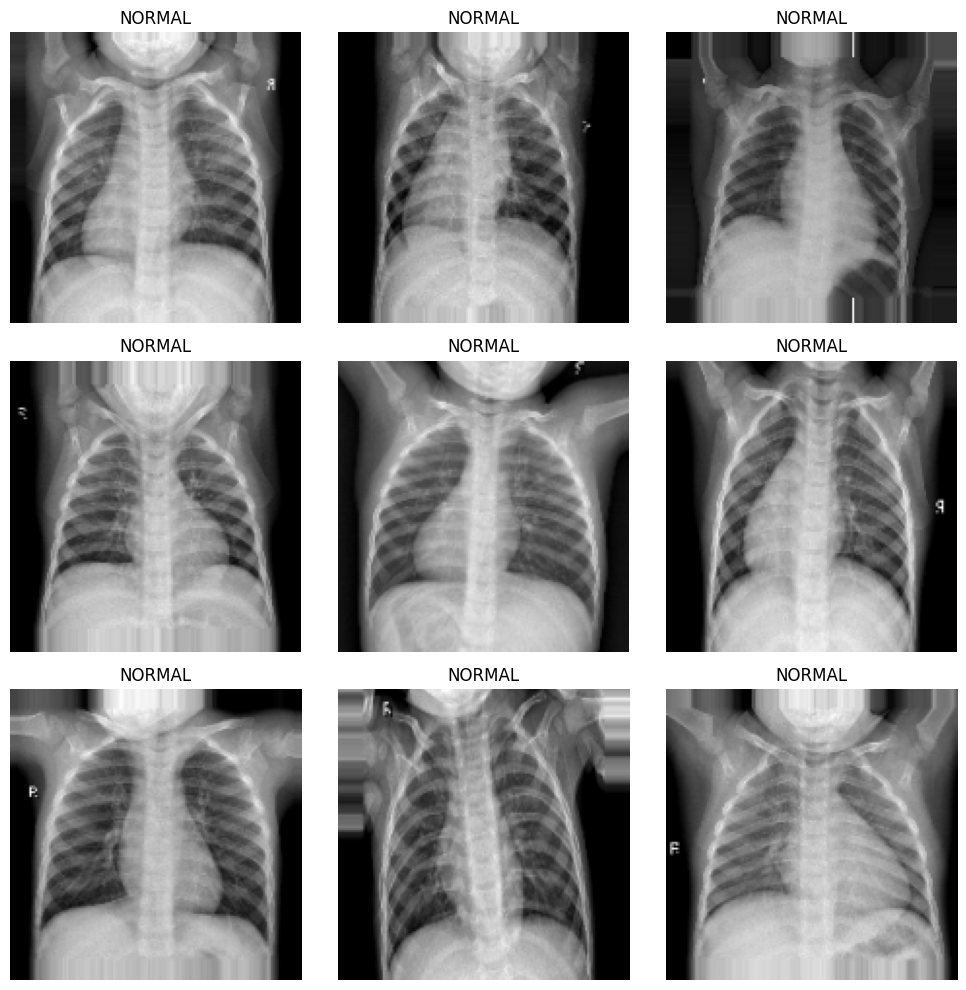

PNEUMONIA Images:


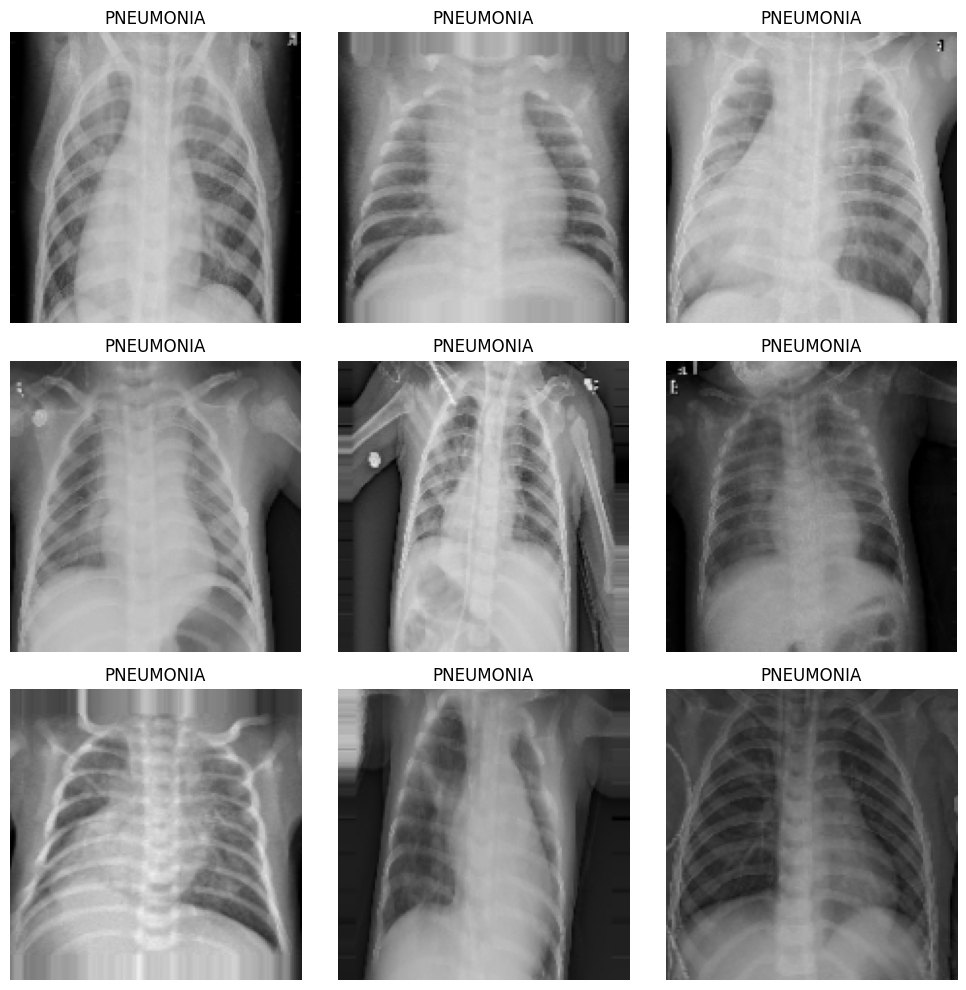

In [69]:
# Filter images by class
normal_images = images[labels == 0]
pneumonia_images = images[labels == 1]

# Plot NORMAL images
print("NORMAL Images:")
plot_images(normal_images, labels[labels == 0], num_images=min(9, len(normal_images)))

# Plot PNEUMONIA images
print("PNEUMONIA Images:")
plot_images(pneumonia_images, labels[labels == 1], num_images=min(9, len(pneumonia_images)))

## CNN MODEL

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32 , (3,3) , activation='relu',input_shape = input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64 , (3,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128 , (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1 , activation='sigmoid')
])

model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
model.summary()

d:\All The Programs\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [54]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples,
    epochs = 10,
    validation_data = val_generator,
    validation_steps = val_generator.samples
)

Epoch 1/10
 163/5216 ━━━━━━━━━━━━━━━━━━━━ 28:45 341ms/step - accuracy: 0.9421 - loss: 0.1557

d:\All The Programs\Python\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5216/5216 ━━━━━━━━━━━━━━━━━━━━ 56s 11ms/step - accuracy: 0.9456 - loss: 0.1524 - val_accuracy: 0.6875 - val_loss: 0.5466
Epoch 2/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 56s 11ms/step - accuracy: 0.9367 - loss: 0.1498 - val_accuracy: 0.7500 - val_loss: 0.4675
Epoch 3/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 55s 11ms/step - accuracy: 0.9448 - loss: 0.1442 - val_accuracy: 0.6875 - val_loss: 0.6824
Epoch 4/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 55s 11ms/step - accuracy: 0.9446 - loss: 0.1402 - val_accuracy: 0.7500 - val_loss: 0.4345
Epoch 5/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 56s 11ms/step - accuracy: 0.9519 - loss: 0.1351 - val_accuracy: 0.7500 - val_loss: 0.5928
Epoch 6/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 54s 10ms/step - accuracy: 0.9457 - loss: 0.1370 - val_accuracy: 0.6875 - val_loss: 1.1723
Epoch 7/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 55s 10ms/step - accuracy: 0.9545 - loss: 0.1259 - val_accuracy: 0.7500 - val_loss: 0.4534
Epoch 8/10
5216/5216 ━━━━━━━━━━━━━━━━━━━━ 55s 10ms/step - accuracy: 0.9496 - loss: 0.12

# Evaluate the model

In [55]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.9364 - loss: 0.2196
Test Loss: 0.24272292852401733
Test Accuracy: 0.9358974099159241


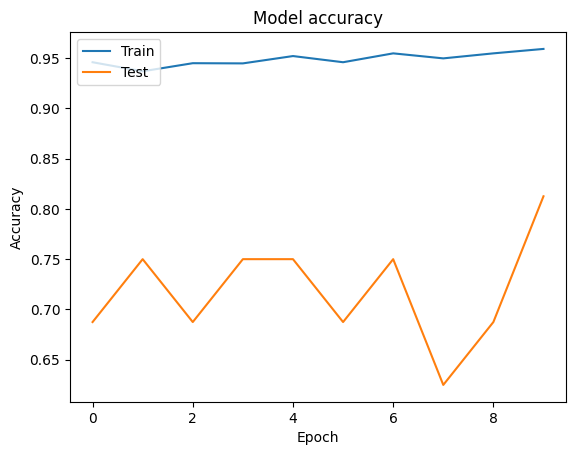

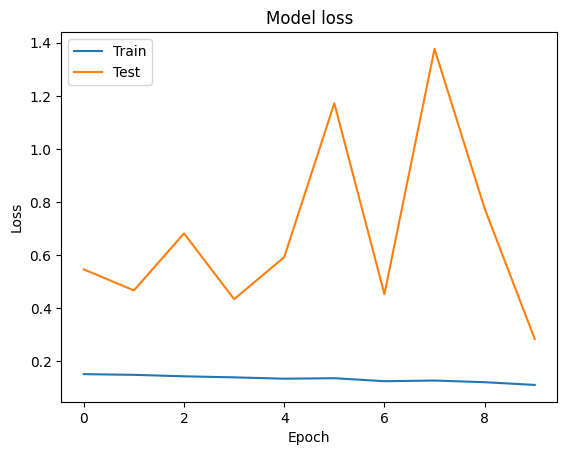

In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Make predictions

In [64]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("PNEUMONIA")
    else:
        print("NORMAL")

# Example usage
predict_image(r"D:\Self_Study\Tutorials ♥♥\Machine Learning\chest_xray\chest_xray\test\PNEUMONIA\person3_virus_15.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
PNEUMONIA


## Save the model

In [65]:
model.save("Chest_Xray.h5")